# Psychoinformatics - Week 14 (Exercises)
by 楊宗樺 (b05705050@ntu.edu.tw)

## 1 進一步研究CNN (6 points)

### 1.1 為何ResNet50會判斷小女孩照片為ping-pong_bal, bubble, or Band_Aid? (3 points)

In [11]:
import numpy as np
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions

model = ResNet50(weights='imagenet')

img_path = '14_images/girl.jpg'
img = image.load_img(img_path, target_size=(224, 224)) # Or use cv2.resize to resize images
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n03942813', 'ping-pong_ball', 0.12260579), ('n09229709', 'bubble', 0.094113834), ('n02786058', 'Band_Aid', 0.07347264)]


#### 因為女孩的頭圓圓的，且眼睛圓圓的亮亮的，比較偏向乒乓球和泡泡，女孩鼻頭上的樹葉形狀像是ok蹦。
#### 雖然前三名為乒乓球和泡泡和ok蹦，但可看出機率相當低，最高才0.12260579。

### 1.2 請展示有別人pre-trained好的Keras model可以成功辨認girl.jpg為人臉 (3 points)

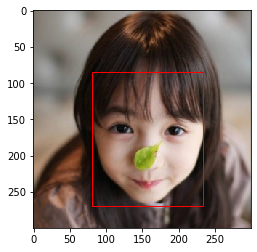

In [16]:
from matplotlib.patches import Rectangle
from mtcnn import MTCNN
from matplotlib import pyplot as plt
import cv2
img = plt.imread(img_path)
detector = MTCNN()
face=detector.detect_faces(img)
for i in face:
    if i['confidence']<0.9:
        face.remove(i)
                
def highlight_faces(image_path, faces):
  # display image
    image = plt.imread(image_path)
    plt.imshow(image)

    ax = plt.gca()

    # for each face, draw a rectangle based on coordinates
    for face in faces:
        x, y, width, height = face['box']
        face_border = Rectangle((x, y), width, height,
                          fill=False, color='red')
        ax.add_patch(face_border)
    plt.show()
    
highlight_faces(img_path,face)

參考資料為 https://github.com/ipazc/mtcnn 
        https://www.sitepoint.com/keras-face-detection-recognition/

#### 我設confidence>=0.9才為人臉，原本在左下角也有被匡出人臉。
#### 若圖片都沒有被匡出，則判段圖片非人臉